# Salary Prediction and analysis

## Importing Necessary Libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data

In [2]:
df = pd.read_csv('data/ds_salaries.csv')

## Inspecting the data

In [4]:
# Seeems like we have no null data. That looks good
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [7]:
df.remote_ratio.unique()

array([100,   0,  50])

In [8]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [9]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [10]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3509,2021,MI,FT,Data Architect,170000,USD,170000,US,100,US,L
3611,2021,MI,FT,Data Architect,180000,USD,180000,US,100,US,L
3117,2022,EN,FT,Data Engineer,129000,USD,129000,US,100,US,L
2908,2022,SE,FT,Data Analyst,115000,USD,115000,US,0,US,L
2837,2022,EN,FT,Data Scientist,73000,USD,73000,US,0,US,M
3397,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
2127,2022,SE,FT,Data Specialist,70000,USD,70000,US,0,US,M
1809,2023,SE,FT,Data Engineer,182000,USD,182000,US,100,US,M
1828,2022,SE,FT,Data Science Consultant,122000,USD,122000,US,0,US,M
2526,2022,MI,FT,Data Analyst,80000,USD,80000,US,0,US,M


## Exploring the work_year column

In [11]:
df.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

<Axes: xlabel='work_year'>

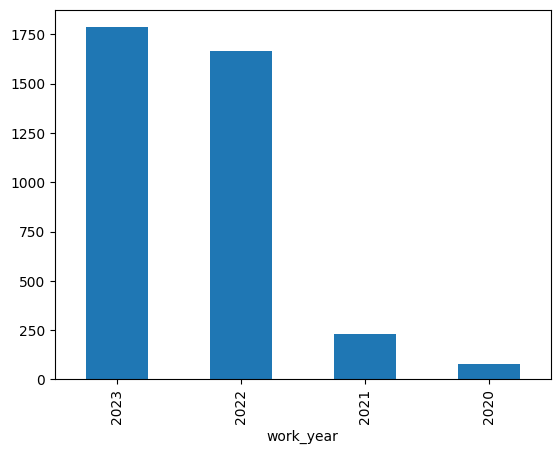

In [12]:
df.work_year.value_counts().plot(kind = 'bar')

## Exploring the experience_level column

In [13]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

## Cleaning the job title column

In [14]:
def attribute_job_title(row):
    row  = row.lower()
    eng = 'data engineer'
    eng2 = 'research engineer'
    sci = 'data scien'
    sci2 = 'research scientist'
    sci3 = 'etl'
    ana = 'data analyst'
    ana2 = 'bi developer'
    ana3 = 'analytics'
    ai = 'artificial intelligence'
    ai2 = 'ai'
    ai3 = 'ml'
    ai4 = 'machine learning'
    ai5 = 'computer vision'
    ai6 = 'deep learning'
    ai7 = 'nlp'
    if eng in row or eng2 in row or 'architect' in row or 'management' in row:
        return 'Data Engineer'
    elif ana in row or ana2 in row or ana3 in row or 'analyst' in row:
        return 'Data Analyst'
    elif ai in row or ai2 in row or ai3 in row or ai4 in row or ai5 in row or ai6 in row or ai7 in row or 'autonomous' in row:
        return 'Machine Learning Engineer'
    elif sci in row or sci2 in row or sci3 in row or 'scientist' in row:
        return 'Data Scientist'
    elif 'data' in row  or 'engineer' in row:
        return 'Data Engineer'
    return row 

df['job_title'].apply(attribute_job_title).value_counts()

job_title
Data Engineer                1300
Data Scientist               1139
Data Analyst                  835
Machine Learning Engineer     481
Name: count, dtype: int64

In [15]:
df['job_title'] = df['job_title'].apply(attribute_job_title)

In [16]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3119,2020,EN,FT,Data Engineer,1000000,INR,13493,IN,100,IN,L
244,2023,SE,FT,Data Scientist,145000,USD,145000,US,0,US,M
933,2023,MI,FT,Data Engineer,85000,GBP,103294,GB,0,GB,M
2777,2022,MI,FT,Data Engineer,60000,USD,60000,US,100,US,M
635,2023,SE,FT,Data Scientist,186300,USD,186300,US,100,US,M
3700,2021,MI,FT,Data Scientist,160000,USD,160000,US,100,US,L
2176,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2690,2022,MI,FT,Data Analyst,108000,USD,108000,US,100,US,M
3047,2022,SE,FT,Machine Learning Engineer,131300,USD,131300,US,100,US,L
720,2023,SE,FT,Data Engineer,184000,USD,184000,US,100,US,M


## Dropping the salary and salary_currency column

In [17]:
df.drop(['salary', 'salary_currency'], axis  = 1, inplace = True)

In [18]:
df.sample(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1496,2023,SE,FT,Data Analyst,141290,US,0,US,M
1747,2023,SE,FT,Data Scientist,200000,US,0,US,M


## Cleaning the company location column

<Axes: xlabel='company_location'>

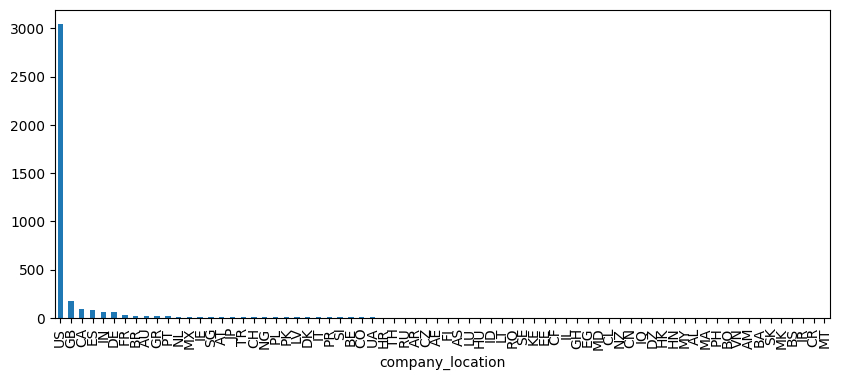

In [19]:
df.company_location.value_counts().plot(kind = 'bar', figsize = (10,4))

In [20]:
df.company_location.value_counts()[:10]

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64

In [21]:
def allocate_company_location(row):
    sig_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']
    if row in sig_countries:
        return row 
    return 'other countries'


df['company_location'].apply(allocate_company_location).value_counts()

company_location
US                 3040
other countries     231
GB                  172
CA                   87
ES                   77
IN                   58
DE                   56
FR                   34
Name: count, dtype: int64

In [22]:
df['company_location'] = df['company_location'].apply(allocate_company_location)

In [23]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3066,2022,SE,FT,Data Analyst,48000,AR,100,US,S
1516,2023,SE,FT,Data Scientist,104000,US,100,US,M
501,2023,SE,FT,Data Scientist,225000,US,0,US,M
3269,2022,SE,FT,Data Scientist,98506,GB,0,GB,M
1986,2022,SE,FT,Data Scientist,150000,US,100,US,M
3518,2021,EX,FT,Data Scientist,85000,RU,0,other countries,M
575,2023,SE,FT,Data Engineer,160000,CA,100,CA,M
386,2023,SE,FT,Data Scientist,104650,US,100,US,M
2286,2022,SE,FT,Data Scientist,104000,US,100,US,M
1320,2023,MI,FT,Machine Learning Engineer,121523,GB,0,GB,M




## Exploring the employment_type column

In [24]:
# we can see that the employment type is ok so we leave it like that
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

## Cleaning the employee_residence column

In [32]:
df.employee_residence.value_counts()[:10]

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
Name: count, dtype: int64

In [26]:
def allocate_employee_residence(row):
    sig_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']
    if row in sig_countries:
        return row
    return 'other countries'

df['employee_residence'].apply(allocate_employee_residence).value_counts()

employee_residence
US                 3004
other countries     262
GB                  167
CA                   85
ES                   80
IN                   71
DE                   48
FR                   38
Name: count, dtype: int64

## Explorng the company_size_column

In [27]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [31]:
# we can see that the company size is also ok so we leave it like that
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [29]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
